# Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.



In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface



### Loading the required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import nltk
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

import pickle as pickle
from pathlib import Path

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...




#### Loading the data

In [2]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# File path to store and access project files
filepath = "/content/drive/MyDrive/Colab Notebooks/Project_sentiment_based_recommendation_system/"

In [4]:
# Read csv file sample30.csv from filepath
df_data = pd.read_csv(filepath + "sample30.csv")

In [5]:
# Checking the data
df_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative



# Data Cleaning

In [6]:
# Descriptive statistics for numerical columns (reviews_rating)
desc_stats = df_data['reviews_rating'].describe()
print("Descriptive Statistics for Reviews Ratings:")
print(desc_stats)

Descriptive Statistics for Reviews Ratings:
count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64


#### Handling missing data as required

In [7]:
# Checking for missing data in the dataset
missing_data = df_data.isnull().sum().sort_values(ascending=False)

# Calculating the percentage of missing values for each column
missing_percentage = (df_data.isnull().mean() * 100).sort_values(ascending=False)

# Combining both count and percentage into a DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})

print("\nMissing Data Summary (Count and Percentage):")
print(missing_data_summary)


Missing Data Summary (Count and Percentage):
                      Missing Count  Missing Percentage
reviews_userProvince          29830           99.433333
reviews_userCity              28071           93.570000
reviews_didPurchase           14068           46.893333
reviews_doRecommend            2570            8.566667
reviews_title                   190            0.633333
manufacturer                    141            0.470000
reviews_username                 63            0.210000
reviews_date                     46            0.153333
user_sentiment                    1            0.003333
id                                0            0.000000
brand                             0            0.000000
categories                        0            0.000000
name                              0            0.000000
reviews_rating                    0            0.000000
reviews_text                      0            0.000000


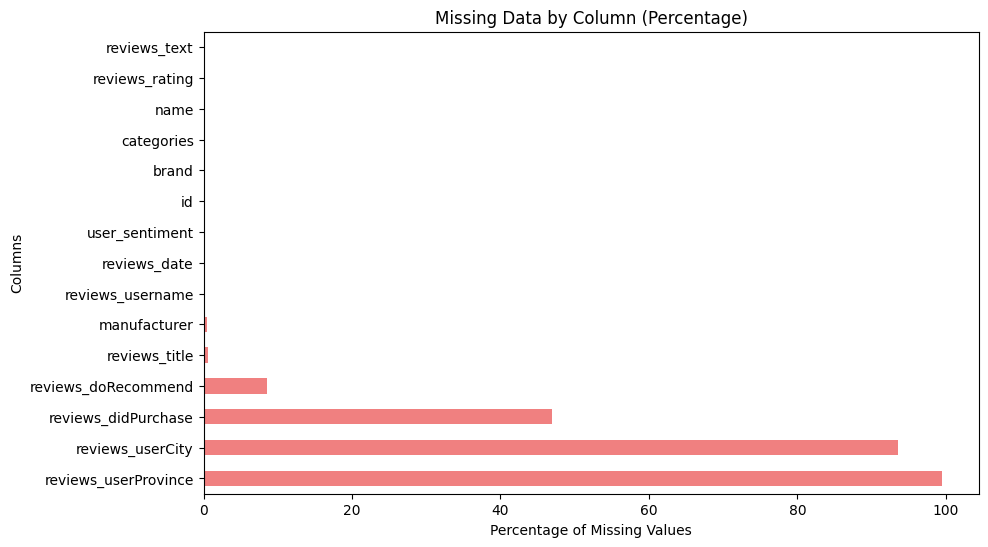

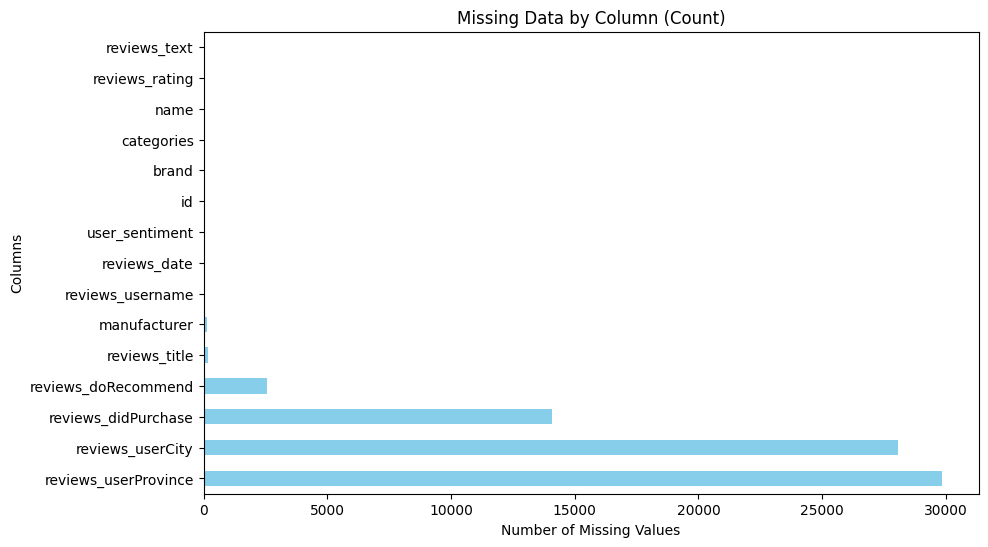

In [8]:
# Generate the plot for missing percentage
plt.figure(figsize=(10, 6))
missing_data_summary['Missing Percentage'].plot(kind='barh', color='lightcoral')
plt.title('Missing Data by Column (Percentage)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

# Generate the plot for missing count
plt.figure(figsize=(10, 6))
missing_data_summary['Missing Count'].plot(kind='barh', color='skyblue')
plt.title('Missing Data by Column (Count)')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

From the above analysis it is shown that the fields "reviews_userProvince" and "reviews_userCity" have more than 90% of missing values.

In [9]:
# Checking the shape of the DataFrame
df_data.shape

(30000, 15)

In [10]:
#  Remove duplicates (if any)
df_cleaned = df_data.drop_duplicates()

In [11]:
# Checking the shape of the DataFrame
df_cleaned.shape

(30000, 15)

In [12]:
# Drop columns with more than 90% missing data. "reviews_userProvince" and "reviews_userCity" will be dropped
missing_threshold = 0.90
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() < missing_threshold]

In [13]:
# Checking the shape of the dataframe after dropping columns which have more than 90% of missing data
df_cleaned.shape

(30000, 13)

In [14]:
# Dropping rows with missing values in the 'reviews_rating' or 'reviews_text' columns
df_cleaned = df_cleaned.dropna(subset=['reviews_rating', 'reviews_text'])

In [15]:
# Checking the shape of the DataFrame
df_cleaned.shape

(30000, 13)

In [16]:
# Fill missing values in categorical fields
df_cleaned['reviews_didPurchase'] = df_cleaned['reviews_didPurchase'].fillna('Null')
df_cleaned['reviews_doRecommend'] = df_cleaned['reviews_doRecommend'].fillna('Null')

In [17]:
# Fill missing dates with a placeholder or convert to proper datetime format
df_cleaned['reviews_date'] = pd.to_datetime(df_cleaned['reviews_date'], errors='coerce')
df_cleaned['reviews_date'] = df_cleaned['reviews_date'].fillna(pd.Timestamp('1970-01-01'))

In [18]:
# Checking the shape of the DataFrame
df_cleaned.shape

(30000, 13)

# Exploratory Data Analysis

#### Viewing the data based on the sentiment distribution

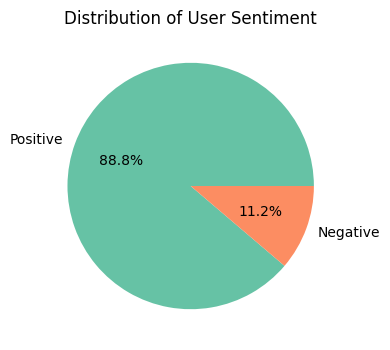

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64


In [19]:
# Calculate sentiment counts and percentages
sentiment_counts = df_cleaned['user_sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of User Sentiment')
plt.show()

# Print the percentage of positive and negative sentiments
print(sentiment_counts)

Above pie chart shows that data is reasonably imbalanced, 88.8% positive and 11.2% negative sentiments in the whole dataset, this will have to be handled.

##### Analysing the data by each ratings

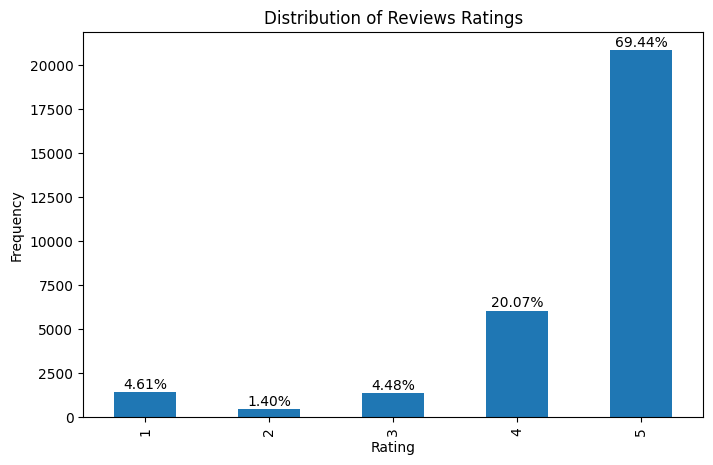

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64


In [20]:
# Calculate the percentage for each rating
rating_counts = df_cleaned['reviews_rating'].value_counts().sort_index()
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Create the bar plot with percentages
plt.figure(figsize=(8, 5))
ax = rating_counts.plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Annotate each bar with the percentage
for i in range(len(rating_percentages)):
    ax.text(i, rating_counts.iloc[i] + 50, f'{rating_percentages.iloc[i]:.2f}%', ha='center', va='bottom')

plt.show()

# Summary statistics of ratings
print(df_cleaned['reviews_rating'].describe())

Above chart shows that dataset has 69.44% of records with rating 5 which is highest and 1.4% of records with rating 2 which is the lowest.

#### Analysing the data to see the products which have highest number of reviews

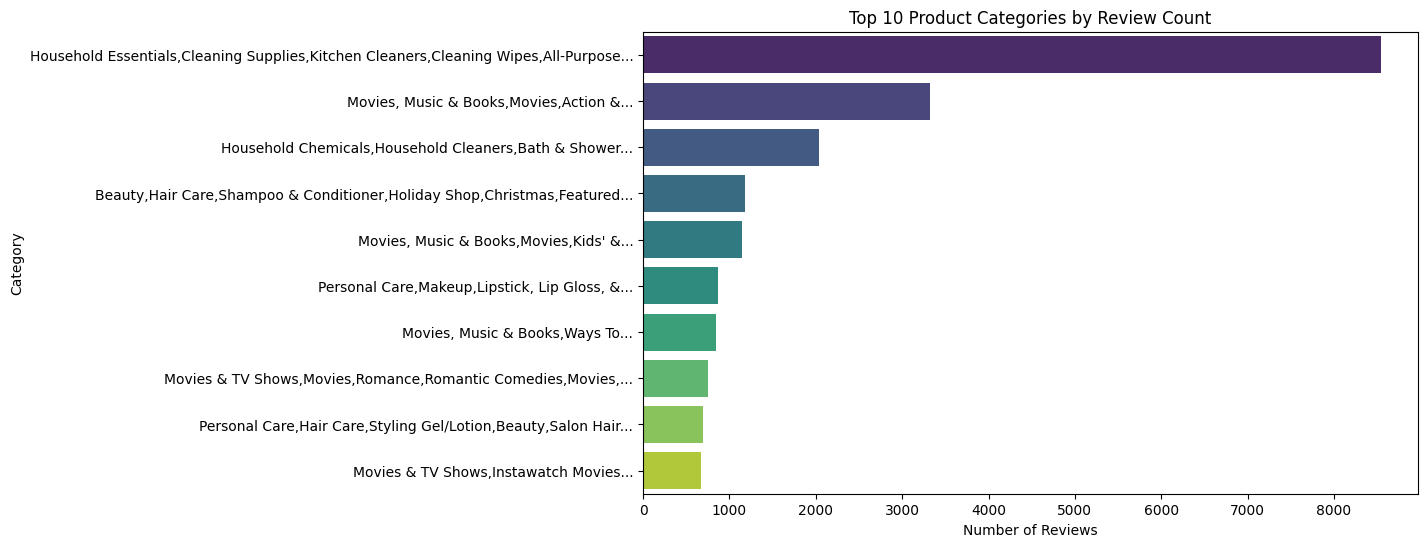

In [21]:
# Function to truncate category names to 5-10 words
def truncate_category_name(category_name, word_limit=10):
    words = category_name.split()
    if len(words) > word_limit:
        return ' '.join(words[:word_limit]) + '...'
    return category_name

# Get the top 10 categories by count
top_categories = df_cleaned['categories'].value_counts().head(10)

# Apply truncation function to category labels
truncated_categories = [truncate_category_name(cat, word_limit=5) for cat in top_categories.index]

# Plot the truncated categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=truncated_categories, palette='viridis')
plt.title('Top 10 Product Categories by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()

Above chart shows that household essential products have most number of reviews.

#### Analysing the data based on the product brands

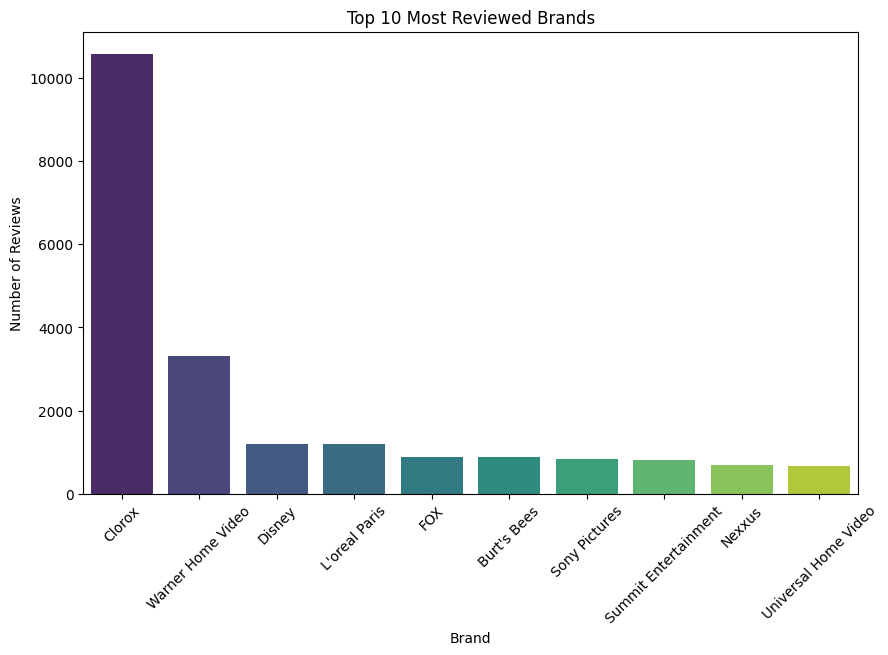

In [22]:
# Top 10 most reviewed brands
top_brands = df_cleaned['brand'].value_counts().head(10)

# Plot the top brands
plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Reviewed Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

Above chart shows that 'Clorox' is the most reviewd brand.

#### Analysing the data based on the manufacturer

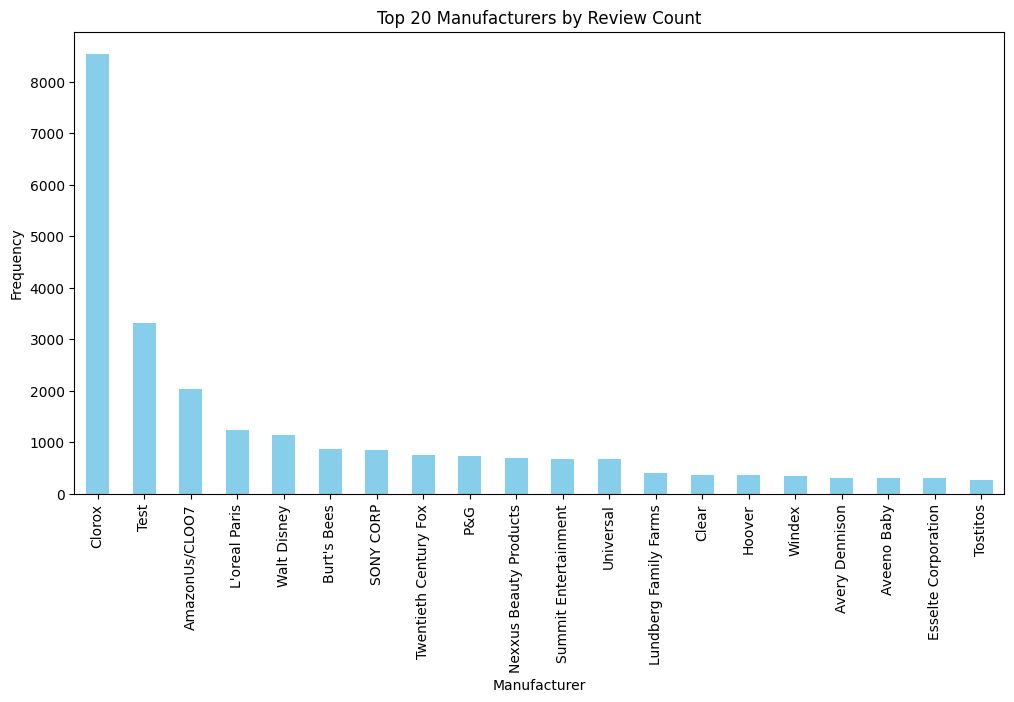

In [23]:
# Top 20 Manufacturer Distribution Graph
plt.figure(figsize=(12, 6))
df_cleaned['manufacturer'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Manufacturers by Review Count')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Again 'Clorox' manufacturer has the highest number of the reviews.

#### Viewing the review trends over the time period

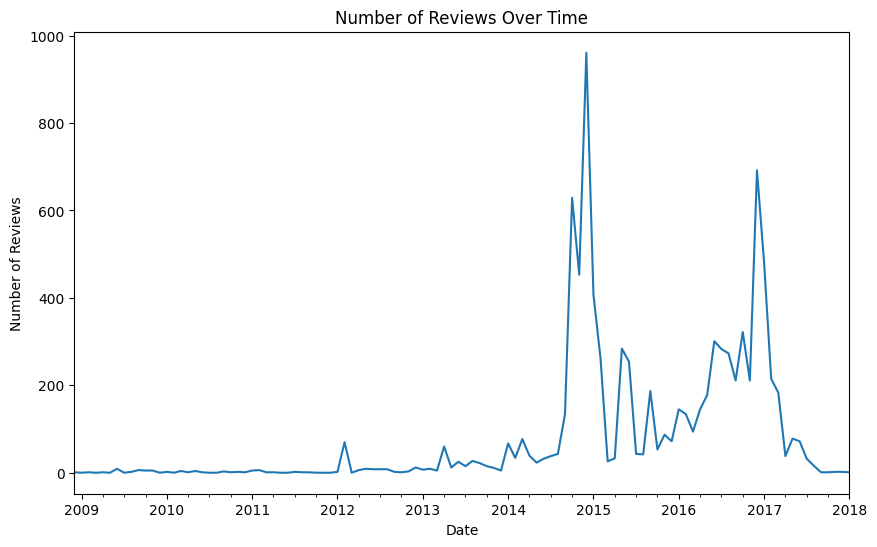

In [24]:
# Review frequency over the years
df_cleaned['reviews_date'] = pd.to_datetime(df_cleaned['reviews_date'], errors='coerce')

# Plot the number of reviews over time
df_cleaned.set_index('reviews_date')['name'].resample('M').count().plot(figsize=(10,6))
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

Above chart shows that people have reviewed the products more in 2015, followed by 2017.

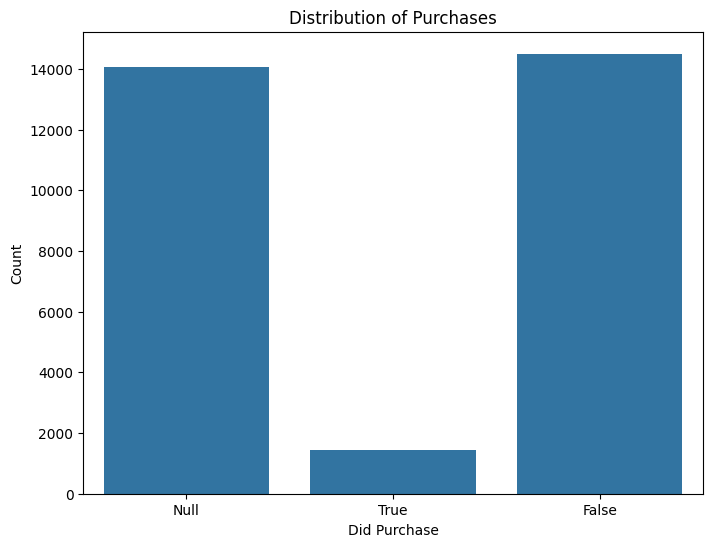

In [25]:
# Plot the count of reviews for each value of 'reviews_didPurchase'
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews_didPurchase', data=df_cleaned)

# Add titles and labels to the plot
plt.title('Distribution of Purchases')
plt.xlabel('Did Purchase')
plt.ylabel('Count')

# Display the plot
plt.show()

Above chart shows that only small amount of people who reviewed the products actually purchased them.

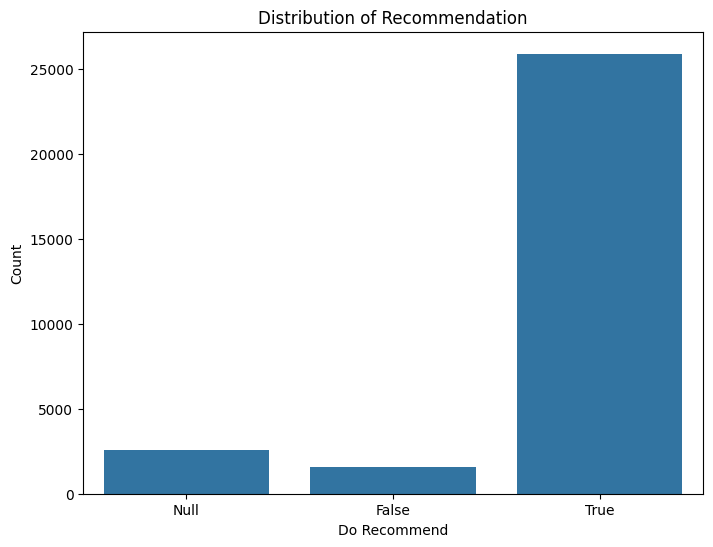

In [26]:
# Plot the count of reviews for each value of 'reviews_doRecommend'
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews_doRecommend', data=df_cleaned)

# Add titles and labels to the plot
plt.title('Distribution of Recommendation')
plt.xlabel('Do Recommend')
plt.ylabel('Count')

# Display the plot
plt.show()

Above chart shows that most number of people recommend the products

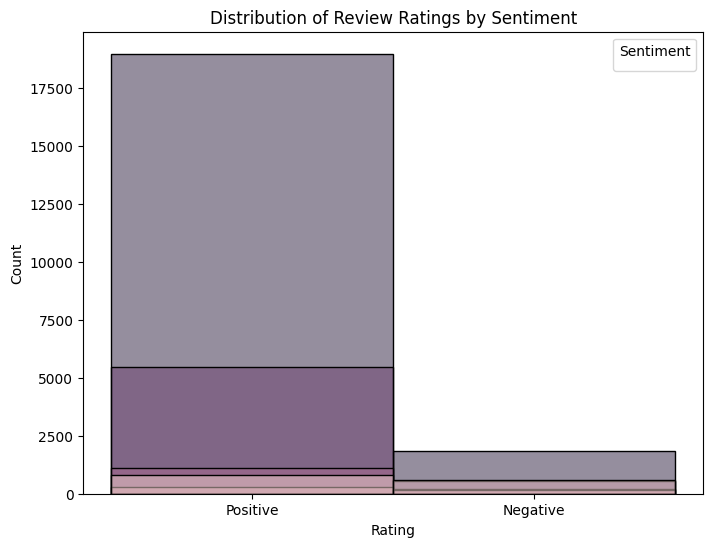

In [27]:
# Sentiment vs Rating
plt.figure(figsize=(8,6))
sns.histplot(x='user_sentiment', hue='reviews_rating', data=df_cleaned)

# Adding titles and labels to the plot
plt.title('Distribution of Review Ratings by Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')

# Display the plot
plt.show()

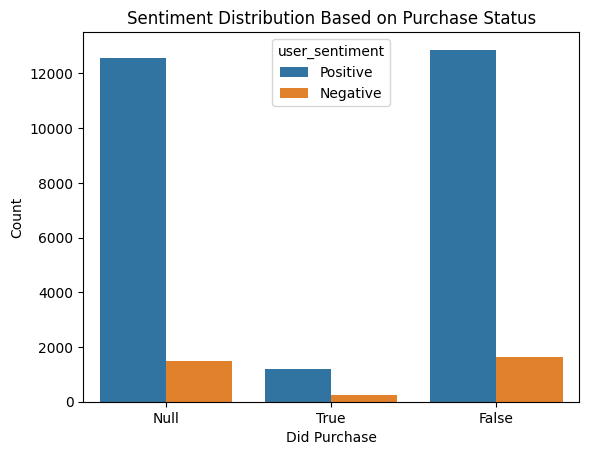

In [28]:
# Sentiment vs Did Purchase
sns.countplot(x='reviews_didPurchase', hue='user_sentiment', data=df_cleaned)
plt.title('Sentiment Distribution Based on Purchase Status')
plt.xlabel('Did Purchase')
plt.ylabel('Count')

# Display the plot
plt.show()

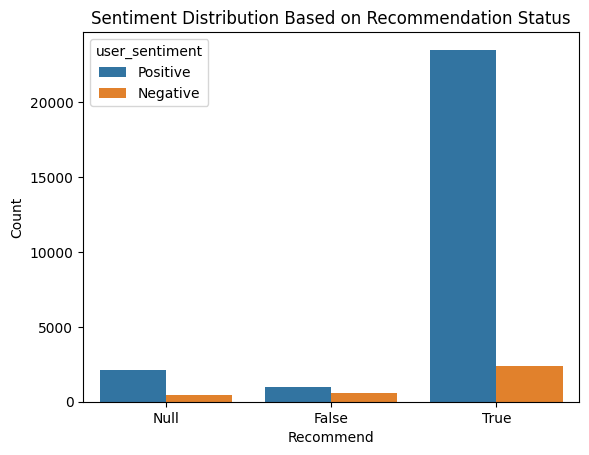

In [29]:
# Sentiment vs Recommended
sns.countplot(x='reviews_doRecommend', hue='user_sentiment', data=df_cleaned)
plt.title('Sentiment Distribution Based on Recommendation Status')
plt.xlabel('Recommend')
plt.ylabel('Count')

# Display the plot
plt.show()

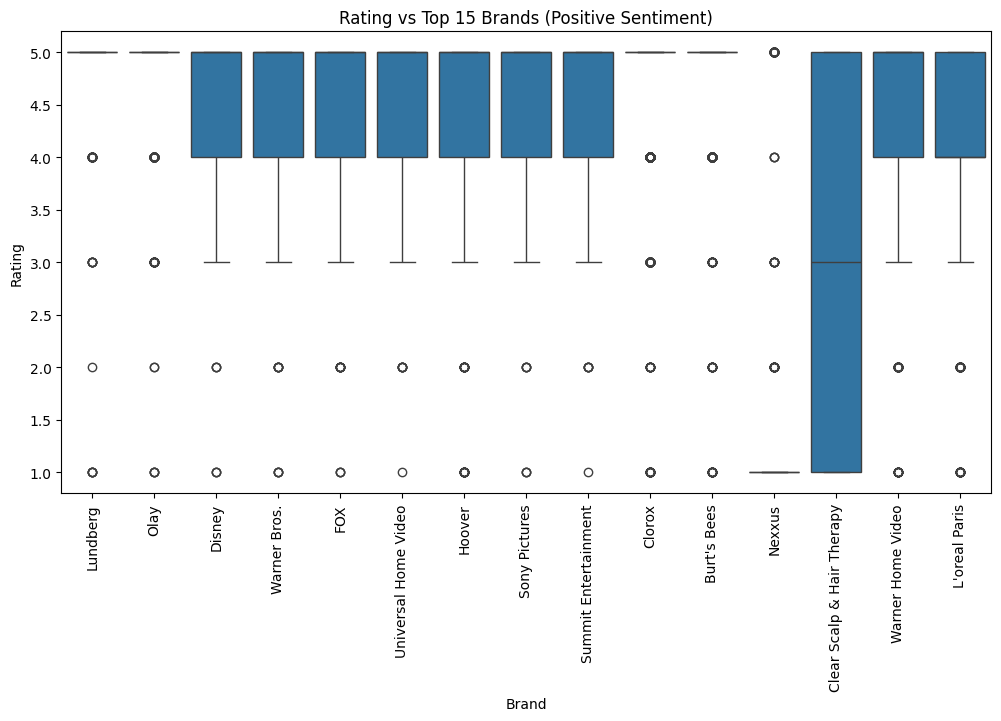

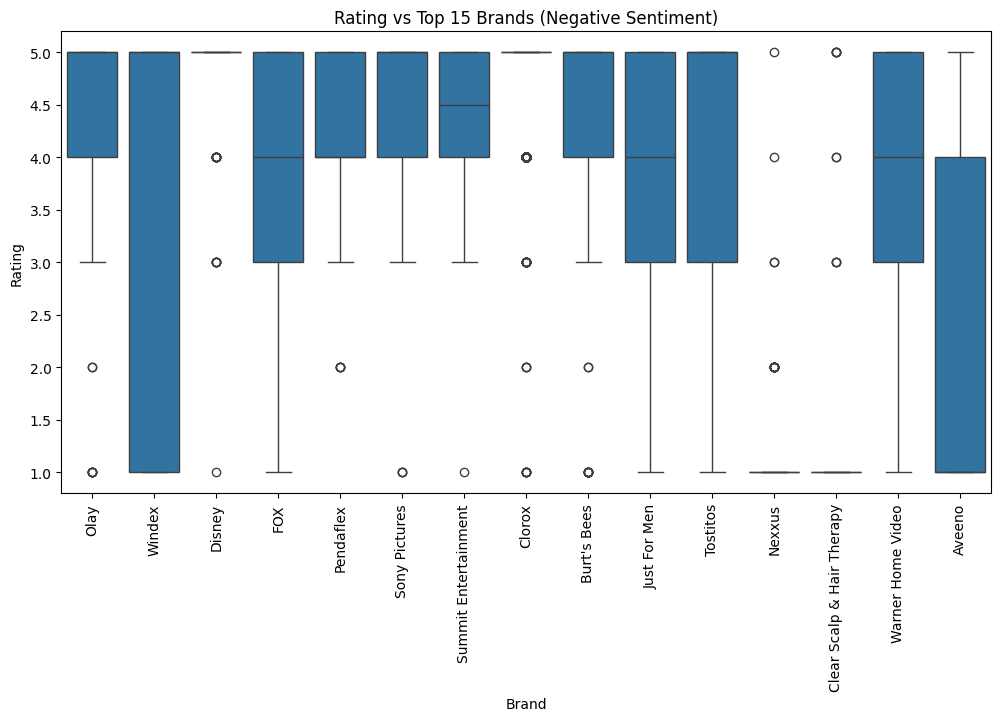

In [30]:
#Brands vs User_Sentiment vs Rating
# Filter the data for positive and negative sentiments
df_pos = df_cleaned[df_cleaned['user_sentiment'] == 'Positive']
df_neg = df_cleaned[df_cleaned['user_sentiment'] == 'Negative']

# Get the top 15 brands by review count for both positive and negative sentiments
top_15_pos_brands = df_pos['brand'].value_counts().nlargest(15).index
top_15_neg_brands = df_neg['brand'].value_counts().nlargest(15).index

# Filter the data for the top 15 brands for positive and negative sentiments
df_top_15_pos_brands = df_pos[df_pos['brand'].isin(top_15_pos_brands)]
df_top_15_neg_brands = df_neg[df_neg['brand'].isin(top_15_neg_brands)]

# Plot Rating vs Brand for top 15 brands with positive sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='reviews_rating', data=df_top_15_pos_brands)
plt.title('Rating vs Top 15 Brands (Positive Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.show()

# Plot Rating vs Brand for top 15 brands with negative sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='reviews_rating', data=df_top_15_neg_brands)
plt.title('Rating vs Top 15 Brands (Negative Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Rating')

# Display the plot
plt.show()

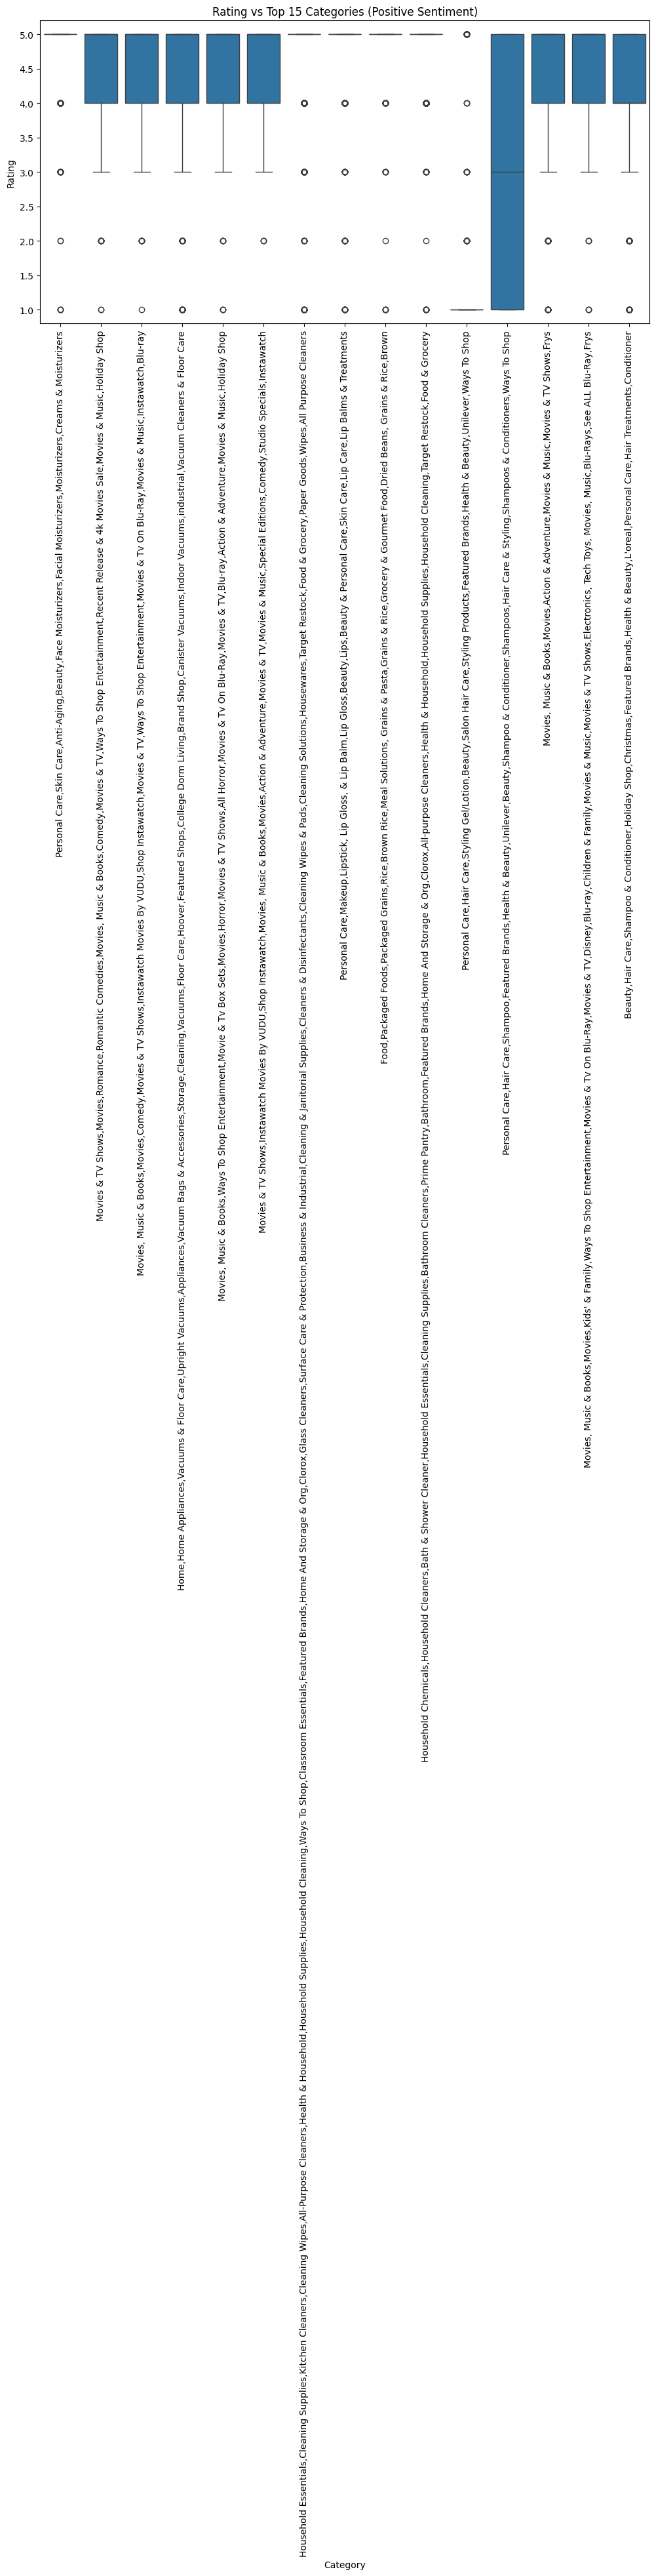

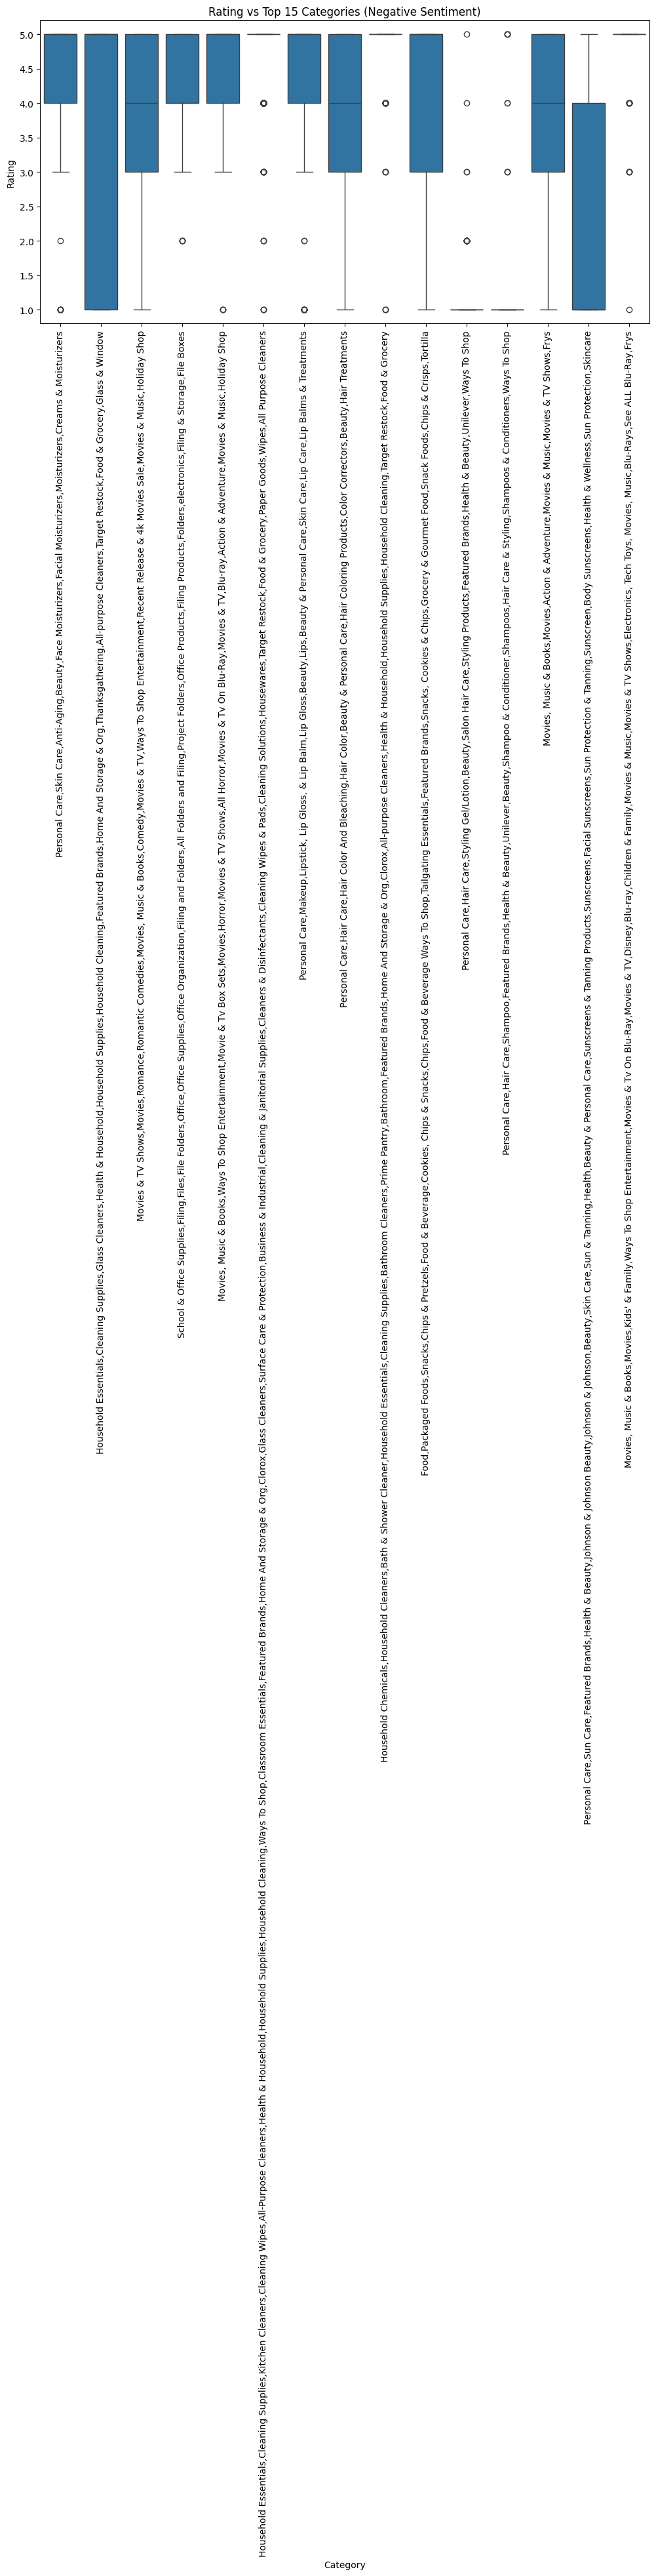

In [31]:
#Categories vs User_Sentiment vs Rating
# Filter the data for the top 15 categories for positive and negative sentiments
top_15_pos_categories = df_pos['categories'].value_counts().nlargest(15).index
top_15_neg_categories = df_neg['categories'].value_counts().nlargest(15).index

# Filter the data for the top 15 categories for positive and negative sentiments
df_top_15_pos_categories = df_pos[df_pos['categories'].isin(top_15_pos_categories)]
df_top_15_neg_categories = df_neg[df_neg['categories'].isin(top_15_neg_categories)]

# Plot Rating vs Category for top 15 categories with positive sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='reviews_rating', data=df_top_15_pos_categories)
plt.title('Rating vs Top 15 Categories (Positive Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# Plot Rating vs Category for top 15 categories with negative sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='reviews_rating', data=df_top_15_neg_categories)
plt.title('Rating vs Top 15 Categories (Negative Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')

# Display the plot
plt.show()


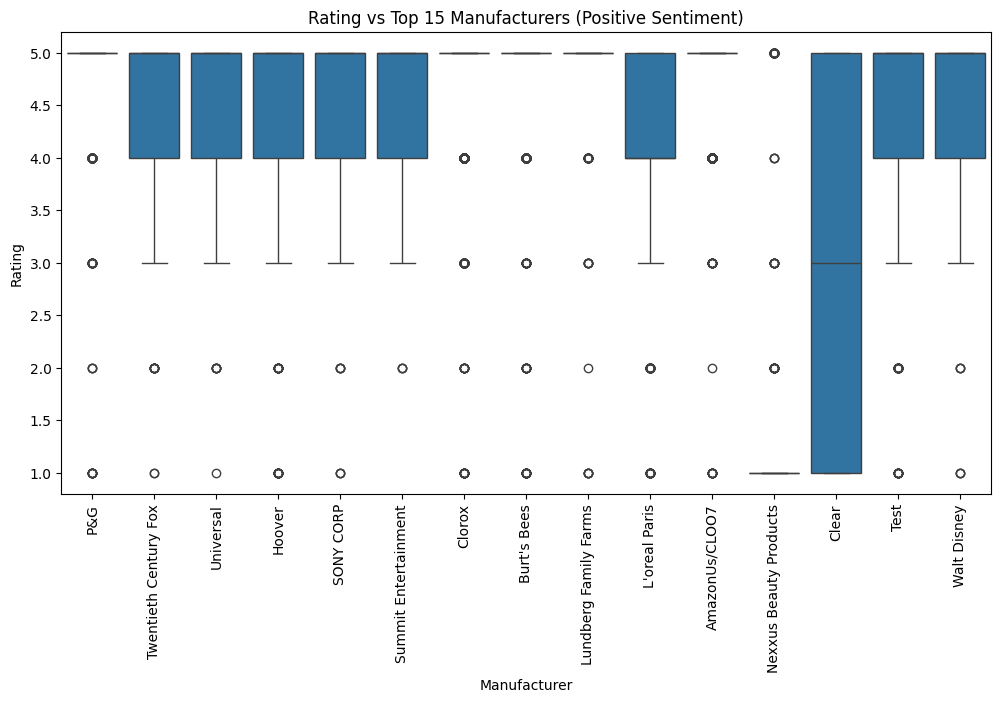

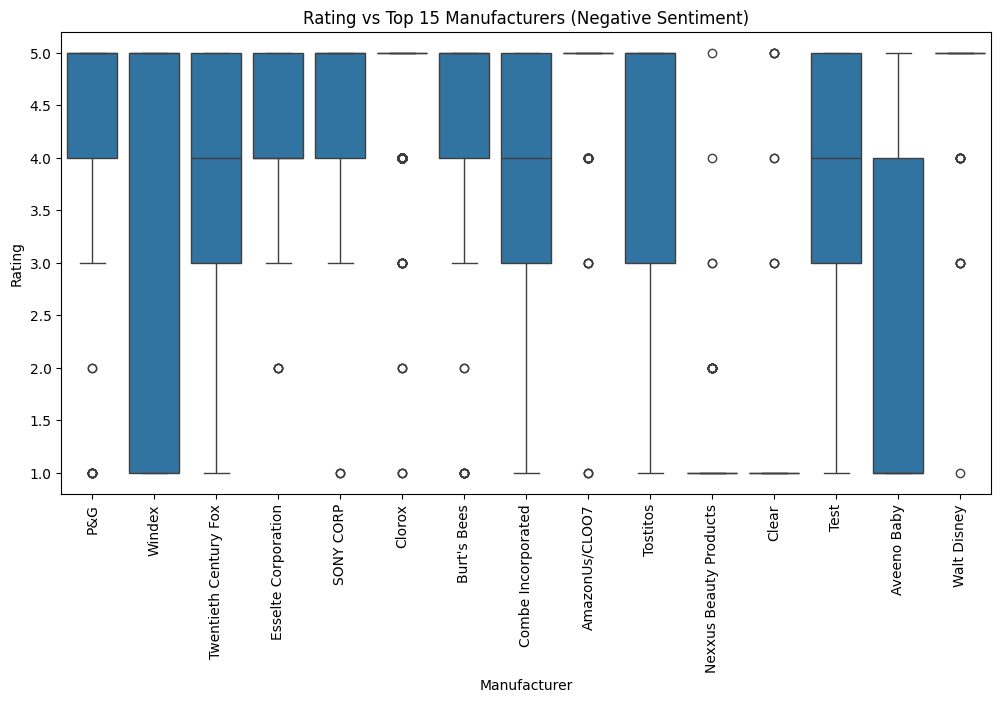

In [32]:
#Manufacturers vs User_Sentiment vs Rating
# Filter the data for the top 15 manufacturers for positive and negative sentiments
top_15_pos_manufacturers = df_pos['manufacturer'].value_counts().nlargest(15).index
top_15_neg_manufacturers = df_neg['manufacturer'].value_counts().nlargest(15).index

# Filter the data for the top 15 manufacturers for positive and negative sentiments
df_top_15_pos_manufacturers = df_pos[df_pos['manufacturer'].isin(top_15_pos_manufacturers)]
df_top_15_neg_manufacturers = df_neg[df_neg['manufacturer'].isin(top_15_neg_manufacturers)]

# Plot Rating vs Manufacturer for top 15 manufacturers with positive sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='reviews_rating', data=df_top_15_pos_manufacturers)
plt.title('Rating vs Top 15 Manufacturers (Positive Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Rating')
plt.show()

# Plot Rating vs Manufacturer for top 15 manufacturers with negative sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='reviews_rating', data=df_top_15_neg_manufacturers)
plt.title('Rating vs Top 15 Manufacturers (Negative Sentiment)')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Rating')

# Display the plot
plt.show()


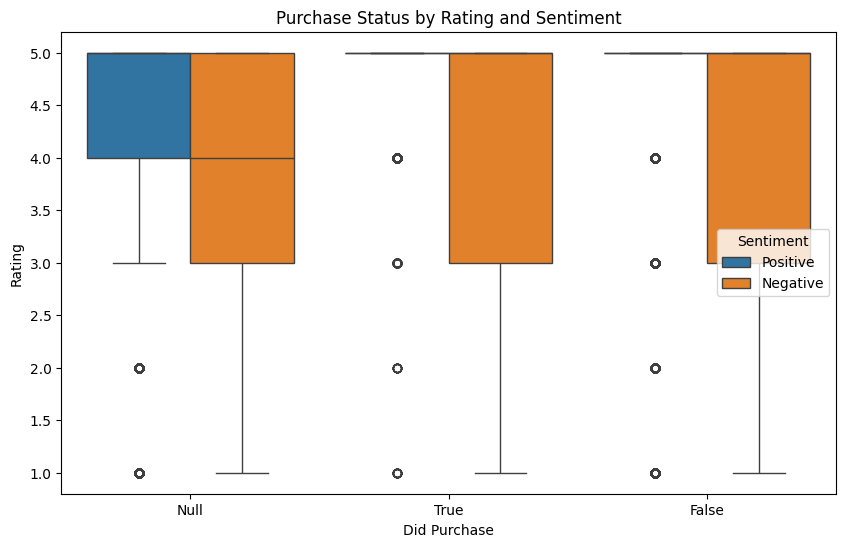

In [33]:
# Plot DidPurchase vs Rating with Sentiment as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews_didPurchase', y='reviews_rating', hue='user_sentiment', data=df_cleaned)
plt.title('Purchase Status by Rating and Sentiment')
plt.xlabel('Did Purchase')
plt.ylabel('Rating')
plt.legend(title='Sentiment')
plt.show()

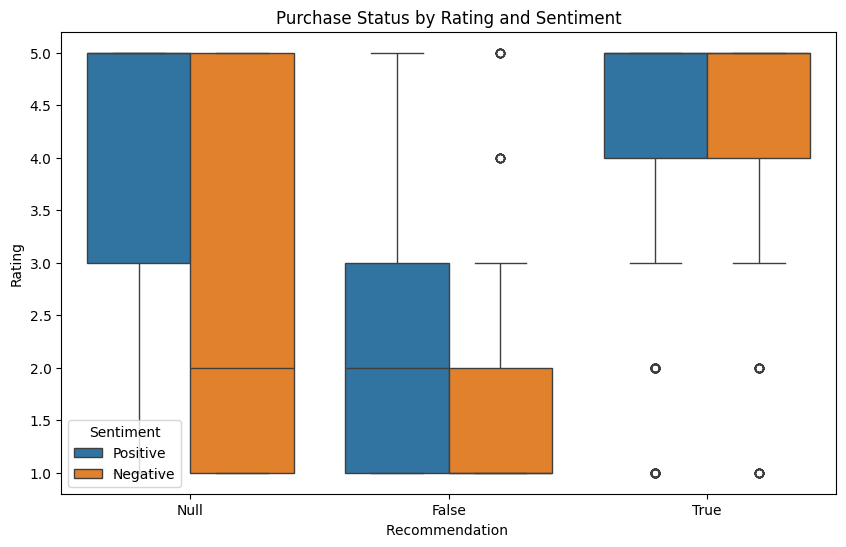

In [34]:
# Plot Recommendation  vs Rating with Sentiment as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews_doRecommend', y='reviews_rating', hue='user_sentiment', data=df_cleaned)
plt.title('Purchase Status by Rating and Sentiment')
plt.xlabel('Recommendation ')
plt.ylabel('Rating')
plt.legend(title='Sentiment')

# Display the plot
plt.show()

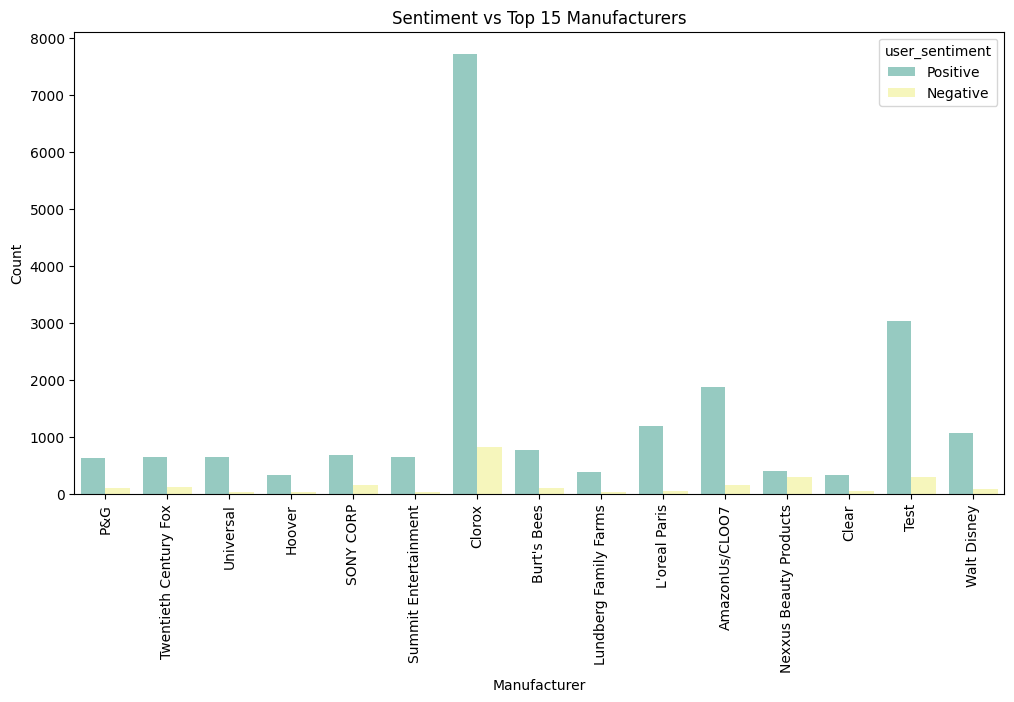

In [35]:
# Get the top 15 manufacturers by review count
top_15_manufacturers = df_cleaned['manufacturer'].value_counts().nlargest(15).index

# Filter the dataframe to include only the reviews for the top 15 manufacturers
df_top_15_manufacturers = df_cleaned[df_cleaned['manufacturer'].isin(top_15_manufacturers)]

# Plot Sentiment vs Manufacturer for top 15 manufacturers
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', hue='user_sentiment', data=df_top_15_manufacturers, palette='Set3')
plt.title('Sentiment vs Top 15 Manufacturers')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Checking the data for the duplicates based on user name and product id

In [36]:
# Identifying duplicate entries in the dataframe based on the combination of 'reviews_username' and 'id'
duplicates = df_cleaned[df_cleaned.duplicated(subset={"reviews_username","id"})]

# Counting the number of duplicate reviews per user
duplicates.reviews_username.value_counts()

,count
reviews_username,
byamazon customer,39
mike,24
chris,19
tony,7
movielover,6
...,...
kayet19,1
spidysgirl,1
gissela,1


### Dropping the duplicates based on review_username and product id, keeping the first line/row.

In [37]:
# Dropping duplicate reviews for the same user and product combination
df_model =  df_cleaned.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [38]:
# Checking the shape of the dataframe
df_model.shape

(27605, 13)

In [39]:
#df_model.to_csv('processed_reviews.csv', index=False)

In [40]:
# Listing all the columns
df_model.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [41]:
# Combine the 'reviews_text' and 'reviews_title' into a new column 'review_combined'
df_model['review_combined'] = df_model['reviews_title'].fillna('') + ' ' + df_model['reviews_text'].fillna('')

# Text Preprocessing

Converting to lower case, removing special characters, tokenizing and lemmetizing

In [42]:
# Define a function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [43]:

# Apply the preprocessing function to the 'review_combined' column
df_model['review_combined_processed'] = df_model['review_combined'].apply(preprocess_text)
df_model['review_combined_processed'] = df_model['review_combined_processed'].fillna('')

# Select only the relevant columns: 'review_combined_processed', 'reviews_rating', 'user_sentiment'
final_df = df_model[['review_combined_processed', 'reviews_rating', 'user_sentiment']]

In [44]:
# Setting the display option
pd.set_option('display.max_colwidth', None)

In [45]:
# Displaying the first 50 rows
final_df.head(50)

,review_combined_processed,reviews_rating,user_sentiment
0,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,5,Positive
1,good good flavor review collected part promotion,5,Positive
3,disappointed read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant le money le mess,1,Negative
4,irritation husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel,1,Negative
5,worth boyfriend bought spice thing bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing buy,1,Negative
6,disappointing bought earlier today excited check based product description expecting something like regular ky fan expected left little disappointed,1,Negative
7,happy bought product husband try impressed tingling warming left u sticky used ky product past loved ky one disappointing,1,Negative
8,disappointing husband bought extra fun werevboth extremely disappointed especially price waste money product felt nothing sticky mess,1,Negative
9,dont buy got surprise husband nothing special lube save money get plain ky need lube wish could return refund,1,Positive
10,pretty dissapoitned tried husband felt different effect change first te using ky gel sure want try others,1,Negative


In [46]:
# Assigning 'final_df' to a new variable 'data'
data = final_df

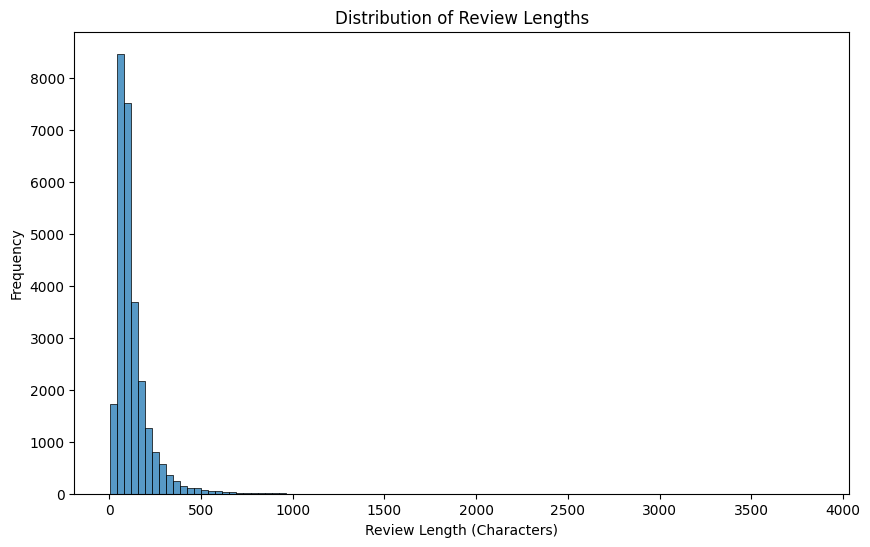

In [47]:
# Review length
doc_len = data['review_combined_processed'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(doc_len, bins=100)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.show()

#### Checking the most words occuring using word cloud

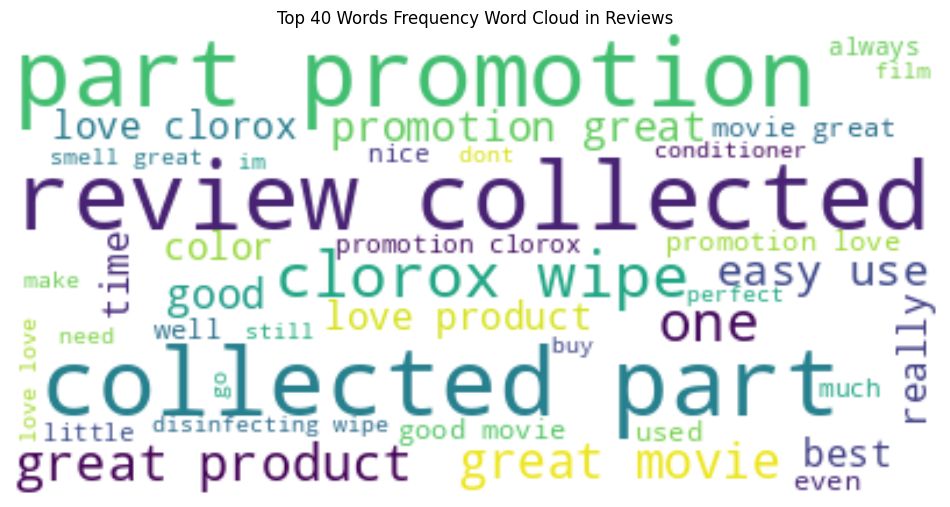

In [48]:
# Combine all review texts into a single string
text = ' '.join(data['review_combined_processed'].dropna())

# Create and configure the WordCloud object
wordcloud = WordCloud(
    max_words=40,  # Limit to top 40 words
    random_state=1,
    stopwords=set(STOPWORDS),  # Use the default stopwords plus additional custom ones if needed
    background_color='white',  # Background color of the word cloud
    colormap='viridis'  # Color map for the word cloud
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 40 Words Frequency Word Cloud in Reviews')
plt.show()

In [49]:
# Tokenize the reviews
tokens = data['review_combined_processed'].str.split()

# Flatten the list of tokens
flat_tokens = [item for sublist in tokens for item in sublist]

# Count the frequency of each word
word_counts = Counter(flat_tokens)

# Get the top 30 unigrams
top_30_unigrams = word_counts.most_common(30)

print("Top 30 Unigrams:")
for word, count in top_30_unigrams:
    print(f"{word}: {count}")

Top 30 Unigrams:
great: 13894
product: 11130
love: 10797
movie: 10451
review: 8336
part: 8176
use: 7771
promotion: 7766
collected: 7764
wipe: 7603
good: 6267
clean: 5721
clorox: 5537
like: 4294
one: 3769
hair: 3662
easy: 3654
smell: 3625
best: 2768
time: 2690
work: 2626
really: 2620
godzilla: 2600
make: 2470
would: 2309
using: 2273
cleaning: 2261
get: 2259
well: 2217
used: 2056


In [50]:
# CountVectorizer to extract and count for in bigrams and trigrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Defining function
def get_top_ngrams(text_data, ngram_range, top_n=30):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_data)
    sum_words = X.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:top_n]

In [51]:
# Combine text to list
text_data = data['review_combined_processed'].dropna().tolist()

In [52]:
# Bigrams
# Get the top 30 bigrams
top_30_bigrams = get_top_ngrams(text_data, ngram_range=(2, 2), top_n=30)

print("\nTop 30 Bigrams:")
for ngram, count in top_30_bigrams:
    print(f"{ngram}: {count}")


Top 30 Bigrams:
review collected: 7762
collected promotion: 7762
clorox wipe: 2623
great product: 1829
great movie: 1678
easy use: 1420
love clorox: 1121
love product: 1042
good movie: 970
movie great: 796
disinfecting wipe: 794
love love: 723
smell great: 685
love wipe: 619
work great: 597
product love: 589
product use: 583
lip shimmer: 580
use clorox: 560
clorox disinfecting: 559
godzilla movie: 553
product great: 511
wipe love: 503
movie good: 456
clorox product: 442
kitchen bathroom: 433
use wipe: 429
wipe use: 425
love movie: 423
product review: 389


In [53]:
# Trigrams
# Get the top 30 trigrams
top_30_trigrams = get_top_ngrams(text_data, ngram_range=(3, 3), top_n=30)

print("\nTop 30 Trigrams:")
for ngram, count in top_30_trigrams:
    print(f"{ngram}: {count}")


Top 30 Trigrams:
review collected promotion: 7762
love clorox wipe: 561
clorox disinfecting wipe: 527
product review collected: 374
clean review collected: 335
use clorox wipe: 321
use review collected: 279
great product love: 267
great movie great: 250
clorox wipe love: 238
movie great movie: 237
wipe easy use: 206
product easy use: 195
love love love: 192
love using clorox: 178
great review collected: 176
great product use: 174
wipe review collected: 171
great product great: 168
using clorox wipe: 162
opinion review collected: 162
clorox wipe great: 156
house review collected: 153
clorox wipe use: 152
love clorox product: 148
love review collected: 147
received product free: 145
bring old formula: 144
clorox wipe easy: 136
good movie good: 135


In [54]:
# Save the data for Deployment
pickle.dump(df_model, open(filepath + "data.pkl","wb"))

In [55]:
# Displaying the first 5 rows
df_model.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_combined,review_combined_processed
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,Null,Null,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,True,Null,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,Good Good flavor. This review was collected as part of a promotion.,good good flavor review collected part promotion
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,rebecca,Negative,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappointed read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant le money le mess
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was bu

# Feature Extraction

Splitting the data into Train and Test

In [56]:
# Define target variable and features

# We convert 'Positive' sentiment to 1 and all others (Negative) to 0.
X = final_df['review_combined_processed']
y = final_df['user_sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)  # 1 for Positive, 0 for Negative

# Split the dataset into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Use TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2))  # Limiting to top 5000 features for efficiency
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

pickle.dump(tfidf, open(filepath + "features.pkl","wb"))

#### Handling Data imbalance identified in the EDA step

In [57]:
# Count occurrences of each class in the original training data
counter = Counter(y_train)
print("Before SMOTE:", counter)

Before SMOTE: Counter({1: 18397, 0: 2306})


In [58]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_tfidf, y_train)

In [59]:
# Count occurrences of each class in the training data after applying SMOTE
counter = Counter(y_train_sm)
print("After SMOTE:", counter)

After SMOTE: Counter({1: 18397, 0: 18397})


# Training a text classification model

Building 4 following models to choose the best one based on the performance
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

In [60]:
# Define parameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'max_iter': [100]
    },
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.3]
    },
    'NaiveBayes': {
        'alpha': [0.1, 1]
    }
}

Defining a user defined function for training, tuning, evaluating the model based on the metrics.

In [61]:
def tune_hyperparameters(model, param_grid, model_name, filepath):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_sm, y_train_sm)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Save the best model using pickle with the provided filepath
    model_save_path = f'{filepath}/{model_name}_best_model.pkl'
    with open(model_save_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f'Model saved at: {model_save_path}')

    # Evaluate the tuned model on the test set
    y_pred = best_model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Sensitivity (Recall for Positive Class)
    sensitivity = tp / (tp + fn)

    # Specificity (Recall for Negative Class)
    specificity = tn / (tn + fp)

    # Print results
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Sensitivity: {sensitivity}')
    print(f'{model_name} Specificity: {specificity}')
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

    # Return the metrics
    return accuracy, sensitivity, specificity

Running the model invoking the user defined function created earlier

In [62]:
# Tune and save Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg_accuracy, log_reg_sensitivity, log_reg_specificity = tune_hyperparameters(log_reg, param_grids['LogisticRegression'], "Logistic_Regression", filepath)

# Tune and save Random Forest
random_forest = RandomForestClassifier(random_state=42)
rf_accuracy, rf_sensitivity, rf_specificity = tune_hyperparameters(random_forest, param_grids['RandomForest'], "Random_Forest", filepath)

# Tune and save XGBoost
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_accuracy, xgb_sensitivity, xgb_specificity = tune_hyperparameters(xgboost, param_grids['XGBoost'], "XGBoost", filepath)


# Tune and save Naive Bayes
naive_bayes = MultinomialNB()
nb_accuracy, nb_sensitivity, nb_specificity = tune_hyperparameters(naive_bayes, param_grids['NaiveBayes'], "Naive_Bayes", filepath)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic_Regression: {'C': 10, 'max_iter': 100}
Model saved at: /content/drive/MyDrive/Colab Notebooks/Project_sentiment_based_recommendation_system//Logistic_Regression_best_model.pkl
Logistic_Regression Accuracy: 0.8890176760359316
Logistic_Regression Sensitivity: 0.9173983739837398
Logistic_Regression Specificity: 0.6569148936170213
Logistic_Regression Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.66      0.56       752
           1       0.96      0.92      0.94      6150

    accuracy                           0.89      6902
   macro avg       0.72      0.79      0.75      6902
weighted avg       0.91      0.89      0.90      6902

------------------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Random_Forest: {'max_depth': 20, 'n_estimators': 100}
Model saved at: /

In [63]:
# Store the model results in a dictionary
model_results = {
    'Model': ['Accuracy', 'Sensitivity', 'Specificity'],
    'Logistic Regression': [log_reg_accuracy, log_reg_sensitivity, log_reg_specificity],
    'Random Forest': [rf_accuracy, rf_sensitivity, rf_specificity],
    'XGBoost': [xgb_accuracy, xgb_sensitivity, xgb_specificity],
    'Naive Bayes' : [nb_accuracy, nb_sensitivity, nb_specificity]
}

# Create a DataFrame to represent the results in a tabular format
results_df = pd.DataFrame(model_results)

# Print the results DataFrame
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
         Model  Logistic Regression  Random Forest   XGBoost  Naive Bayes
0     Accuracy             0.889018       0.851782  0.883222     0.839612
1  Sensitivity             0.917398       0.879187  0.922927     0.869431
2  Specificity             0.656915       0.627660  0.558511     0.595745


# Summary of Model Performance:
## Logistic Regression:

Accuracy: 0.89 (Highest)
Sensitivity (Recall for Positive Class): 0.92 (High)
Specificity (Recall for Negative Class): 0.66 (Better than XGBoost and Naive Bayes)

## Random Forest:

Accuracy: 0.85
Sensitivity: 0.88 (Good)
Specificity: 0.64 (Similar to Logistic Regression)

## XGBoost:

Accuracy: 0.88 (Second highest)
Sensitivity: 0.92 (Highest among all models)
Specificity: 0.56 (Lowest, meaning it struggles with negative sentiment)

## Naive Bayes:

Accuracy: 0.84 (Lowest)
Sensitivity: 0.87 (Lower than others but still decent)
Specificity: 0.59 (Performs better than XGBoost on negative sentiment but worse than Logistic Regression)
Recommendation:
Best Overall Model: Logistic Regression

### Reason: It provides the best balance between accuracy (0.89), high sensitivity (0.92), and reasonable specificity (0.66). It performs well in both identifying positive sentiment and handling negative sentiment, making it a robust choice for a sentiment-based recommendation system.
## Alternative Model: XGBoost

### Reason: XGBoost achieves very high sensitivity (0.92) but suffers from low specificity (0.56). If the focus is more on identifying positive sentiment (and false negatives are less of a concern), XGBoost could be a strong option.

# Conclusion:
### Logistic Regression is recommended for its balanced performance across both sensitivity and specificity, while XGBoost could be considered if you prioritize identifying positive sentiment at the expense of handling negative sentiment.

# Building a recommendation system

# Recommendation System Notebook
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

Different Approaches to develop Recommendation System -

1. Demographich based Recommendation System

2. Content Based Recommendation System

3. Collaborative filtering Recommendation System

In [64]:
# Select relevant columns from the dataset for recommendation purposes
# 'id': Product ID to identify the item.
# 'reviews_rating': The rating given by the user for the product.
# 'reviews_username': The username of the person who reviewed the product.

df_recommend = df_model[['id','reviews_rating','reviews_username']]

In [65]:
# Remove rows where the 'reviews_username' column has missing (NaN) values
# This step ensures that only rows with valid usernames are kept for the recommendation process.
df_recommend = df_recommend[~df_recommend.reviews_username.isna()]

# Rename the columns for easier use:
# 'id' -> 'productId': Refers to the product identifier.
# 'reviews_rating' -> 'rating': Refers to the rating given by the user.
# 'reviews_username' -> 'user': Refers to the username of the user who gave the review.
df_recommend.columns = ['productId', 'rating', 'user']

# Display the first few rows of the cleaned and renamed dataframe
print(df_recommend.head())

              productId  rating       user
0  AV13O1A8GV-KLJ3akUyj       5     joshua
1  AV14LG0R-jtxr-f38QfS       5  dorothy w
3  AV16khLE-jtxr-f38VFn       1    rebecca
4  AV16khLE-jtxr-f38VFn       1  walker557
5  AV16khLE-jtxr-f38VFn       1   samantha


## Dividing the dataset into train and test

In [66]:
# Split the dataset into training and testing sets
# df_recommend: The dataset to be split
# test_size=0.30: 30% of the data will be used for testing
# random_state=12: Ensures reproducibility of the split
train, test = train_test_split(df_recommend, train_size=0.70, random_state=42)

# Print the shape (number of rows and columns) of the training set
print(train.shape)

# Print the shape (number of rows and columns) of the testing set
print(test.shape)

(19311, 3)
(8277, 3)


In [67]:
# Fill missing values (NaNs) with 0
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(0)

# Display the first 3 rows
df_pivot.head(3)

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [68]:
# Copy the train dataset into a new DataFrame called dum_train_rcm
dum_train = train.copy()

# Display the first few rows of the new DataFrame to verify the copy
dum_train.head()

,productId,rating,user
10354,AVpf3VOfilAPnD_xjpun,5,phoebesmom
12495,AVpf3VOfilAPnD_xjpun,5,luisa
14491,AVpf3VOfilAPnD_xjpun,5,jbsmooth
12787,AVpf3VOfilAPnD_xjpun,5,damp123
6417,AVpf385g1cnluZ0-s0_t,5,momon


In [69]:
# The products not rated by user is marked as 1 for prediction.
dum_train['rating'] = dum_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [70]:
# Convert the dummy train dataset into matrix format.
dum_train = dum_train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(1)

# Display the first 5 rows
dum_train.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.

# User Similarity Matrix

## Using Cosine Similarity

In [71]:
# Count the number of unique users in the pivot table index
df_pivot.index.nunique()

17860

In [72]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')

# Replace NaN values in the user_correlation matrix with 0
user_correlation[np.isnan(user_correlation)] = 0

# Print the user similarity matrix
print(user_correlation)

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [73]:
# Check the shape of the user similarity matrix
user_correlation.shape

(17860, 17860)

## Using adjusted Cosine

### Here, we are not removing the NaN values and calculating the mean only for the product rated by the user

In [74]:
# Create a user-product matrix.
df_pivot = train.pivot(
    index='user',
    columns='productId',
    values='rating'
)

In [75]:
# Display the first few rows
df_pivot.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the product for each user around 0 mean

In [76]:
# Compute the mean rating for each user across all products
mean = np.nanmean(df_pivot, axis=1)

# Transpose the pivot table to align with the mean ratings for subtraction
df_subtracted = (df_pivot.T-mean).T

In [77]:
# Display the first few rows
df_subtracted.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [78]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')

# Replace any NaN values in the user_correlation matrix with 0
user_correlation[np.isnan(user_correlation)] = 0

# Print the user similarity matrix to inspect the result
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [79]:
# Ensure that all values in the user_correlation matrix are non-negative
user_correlation[user_correlation<0]=0

# Print the corrected user similarity matrix to inspect the result
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [80]:
# Calculate the predicted ratings for all users and products
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

# Print the predicted ratings matrix to inspect the result
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# Print the shape of the predicted ratings matrix
user_predicted_ratings.shape

(17860, 257)

Since we are interested only in the products not rated by the user, we will ignore the product rated by the user by making it zero.

In [82]:
# Calculate the final ratings by multiplying the predicted ratings with a mask
user_final_rating = np.multiply(user_predicted_ratings,dum_train)

# Display the first few rows of the final ratings matrix
user_final_rating.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding the top 5 recommendation for the *user*

In [83]:
# Take the user ID as input.
user_input = str(input("Enter your user name"))

# Print the user input
print(user_input)

Enter your user name06stidriver
06stidriver


In [84]:
# Display the first few rows
user_final_rating.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Retrieve and sort the top 5 predicted ratings for the specified user
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]

# Display the top 5 recommended products with their predicted ratings
d

,06stidriver
productId,
AV13O1A8GV-KLJ3akUyj,0.0
AVpfE5UF1cnluZ0-dY1N,0.0
AVpfN6Z71cnluZ0-gZmO,0.0
AVpfNVsj1cnluZ0-gNQN,0.0
AVpfNWbPilAPnD_xXPR7,0.0


In [86]:
# Merge the top 5 recommended products with additional product information from df_model
d = pd.merge(d,df_model,left_on='productId',right_on='id', how = 'left')

In [87]:
# Display the merged DataFrame with additional product details
d.head()

,06stidriver,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_combined,review_combined_processed
0,0.0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,Null,Null,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,0.0,AVpfE5UF1cnluZ0-dY1N,Smead,"School & Office Supplies,Filing,Files,File Folders,Seasonal,Back to School Top Items,Office Products,Filing Supplies,Office Supplies,Top Tab File Folders,Office Organization,Office",SMEAD MANUFACTURING CO.,"Smead174 3-In-1 Supertab Section Folders, 1/3 Cut Top Tab, Letter, Assorted, 12/pack",NaT,Null,True,5,I use this folder for all my meetings. Attendees love that nothing falls and sections stay together. I first saw this folder at IAAP conference. I wish I had found it sooner.,Great For Meetings,kmskms,Positive,Great For Meetings I use this folder for all my meetings. Attendees love that nothing falls and sections stay together. I first saw this folder at IAAP conference. I wish I had found it sooner.,great meeting use folder meeting attendee love nothing fall section stay together first saw folder iaap conference wish found sooner
2,0.0,AVpfE5UF1cnluZ0-dY1N,Smead,"School & Office Supplies,Filing,Files,File Folders,Seasonal,Back to School Top Items,Office Products,Filing Supplies,Office Supplies,Top Tab File Folders,Office Organization,Office",SMEAD MANUFACTURING CO.,"Smead174 3-In-1 Supertab Section Folders, 1/3 Cut Top Tab, Letter, Assorted, 12/pack",NaT,Null,True,5,"I use this folder for my CIO when preparing travel docs. Especially with air, hotel, cars, meetings I can put all in one place. I like the colors coding for meetings as well when there are different pieces of information.",Travel Folder,harley712,Negative,"Travel Folder I use this folder for my CIO when preparing travel docs. Especially with air, hotel, cars, meetings I can put all in one place. I like the colors coding for meetings as well when there are different pieces of information.",travel folder use folder cio preparing travel doc especially air hotel car meeting put one place like color coding meeting well different piece information
3,0.0,AVpfN6Z71cnluZ0-gZmO,Caress,"Personal Care,Bath, Shower & Soap,Bar Soap,Bath & Body,Body Wash & Cleansers,Beauty,Bar Soaps,Cleansers,Soaps,Body Cleansers",Caress,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",NaT,False,False,1,"I bought this silky version just to try a new scent.. i usually buy the white jasmine detoxifying body wash, after the first use my skin was red and itchy but i thought it may have been a new perfume i had recently bought. i stopped using the perfume and continued using the body wash only to end up with very red, itchy and bumpy skin... i HIGHLY suggest you pass this product by when shopping for a new body wash.","red, itchy and bumpy irritation",tbrock13,Positive,"red, itchy and bumpy irritation I bought this silky version just to try a new scent.. i usually buy the white jasmine detoxifying body wash, after the first use my skin was red and itchy but i thought it may have been a new perfume i had recently bought. i stopped using the perfume and continued using the body wash

In [88]:
# Extract the unique combinations of 'id', 'brand', 'categories', 'manufacturer', and 'name'
unique_products = d[['id', 'brand', 'categories', 'manufacturer', 'name']].drop_duplicates()

# Display the first few rows of the unique products
print(unique_products.head())

                      id                brand  \
0   AV13O1A8GV-KLJ3akUyj      Universal Music   
1   AVpfE5UF1cnluZ0-dY1N                Smead   
3   AVpfN6Z71cnluZ0-gZmO               Caress   
71  AVpfNVsj1cnluZ0-gNQN  Physician's Formula   
78  AVpfNWbPilAPnD_xXPR7      Pleasant Hearth   

                                                                                                                                                                                                                                          categories  \
0                                                                                     Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                               School & Office Supplies,Filing,Files,File Folders,Seasonal,Back to School Top Items,Office Products,Filing Supplies,Office Supplies,Top Tab File

# Evaluation - User User

In [89]:
# Find out the common users of test and train dataset.
common = test[test.user.isin(train.user)]

# Checking the shape
common.shape

(1071, 3)

In [90]:
# Displaying the top 5 records
common.head()

,productId,rating,user
11649,AVpf3VOfilAPnD_xjpun,5,thebramblett4
319,AV1l8zRZvKc47QAVhnAv,5,terr
14419,AVpf3VOfilAPnD_xjpun,5,davist
6463,AVpf3okQLJeJML43FMif,1,julie
19326,AVpfJP1C1cnluZ0-e3Xy,5,blt66


In [91]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user', columns='productId', values='rating')

In [92]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [93]:
# Display the first row of the DataFrame
df_subtracted.head(1)

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Add the user IDs from the index of df_subtracted to the user_correlation_df DataFrame
user_correlation_df['user'] = df_subtracted.index

# Set the 'user' column as the index of user_correlation_df
user_correlation_df.set_index('user',inplace=True)

# Display the first few rows
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17850,17851,17852,17853,17854,17855,17856,17857,17858,17859
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Display the first row
common.head(1)

,productId,rating,user
11649,AVpf3VOfilAPnD_xjpun,5,thebramblett4


In [96]:
# Convert the 'user' column of `common` DataFrame to a list
list_name = common.user.tolist()

# Update the column names of `user_correlation_df` to match the index of `df_subtracted
user_correlation_df.columns = df_subtracted.index.tolist()

# Filter `user_correlation_df` to include only rows where the index is in `list_name`
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [97]:
# Print the shape of the filtered DataFrame to inspect its dimensions
user_correlation_df_1.shape

(898, 17860)

In [98]:
# Transpose user_correlation_df_1 to match the required shape for further processing
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [99]:
# Transpose user_correlation_df_2 back to its original shape
user_correlation_df_3 = user_correlation_df_2.T

In [100]:
# Display the first few rows
user_correlation_df_3.head()

,00sab00,1234,1943,1witch,abby,abismomy,ac94,acjuarez08,actionaction,adam,...,woody,wvshopaholic,xavier,xmom,xstr8edgex,yummy,yvonne,zipper,zippy,zitro
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Display the first few rows
user_correlation_df_3.shape

(898, 898)

In [102]:
# Ensure all values in user_correlation_df_3 are non-negative
user_correlation_df_3[user_correlation_df_3<0]=0

# Calculate the predicted ratings for users using the updated user correlation matrix
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))

# Print the resulting predicted ratings matrix to inspect the predictions
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28867513, 0.23570226, 0.        , ..., 0.        , 1.02062073,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 1.76776695,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [103]:
# Create a copy of the `common` DataFrame
dummy_test = common.copy()

# Convert ratings in `dummy_test` to binary values
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

# Pivot the `dummy_test` DataFrame to create a matrix of binary ratings
dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating').fillna(0)

In [104]:
# Print the shape of the `dummy_test` DataFrame to check the dimensions
dummy_test.shape

(898, 111)

In [105]:
# Apply the binary mask to the predicted ratings matrix
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [106]:
# Display the first two rows of the adjusted predicted ratings matrix
common_user_predicted_ratings.head(2)

productId,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpftikC1cnluZ0-p31V
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [107]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

# Create a copy of the predicted ratings matrix
X  = common_user_predicted_ratings.copy()

# Keep only positive predicted ratings
X = X[X>0]

# Initialize the MinMaxScaler to scale values to the range [1, 5]
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit and transform the scaler
print(scaler.fit(X))
y = (scaler.transform(X))

# Print the scaled ratings
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [108]:
# Pivot the `common` DataFrame to get the original ratings matrix for comparison
common_ = common.pivot_table(index='user', columns='productId', values='rating')

In [109]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [110]:
# Calculate the RMSE
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5

# Print the RMSE value
print(rmse)

2.458049564617376


In [111]:
# Save the `user_final_rating` matrix to a file using pickle
pickle.dump(user_final_rating.astype('float32'), open(filepath + 'user_final_rating.pkl', 'wb'))

## Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [112]:
# Create a pivot table from the training data
df_pivot = train.pivot(
    index='user',
    columns='productId',
    values='rating'
).T

# Display the first few rows of the transposed pivot table
df_pivot.head()

user,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zpalma,zt313,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the product rating for each product for using the Adujsted Cosine

In [113]:
# Compute the mean rating for each product across all users
mean = np.nanmean(df_pivot, axis=1)

# Subtract the mean rating for each product from each rating
df_subtracted = (df_pivot.T-mean).T

In [114]:
# Display the first few rows
df_subtracted.head()

user,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zpalma,zt313,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [115]:
# Create the Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')

# Replace NaN values in the item_correlation matrix with 0
item_correlation[np.isnan(item_correlation)] = 0

# Print the item similarity matrix
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [116]:
# Ensure all values in the item correlation matrix are non-negative
item_correlation[item_correlation<0]=0

# Print the corrected item similarity matrix
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [117]:
# Calculate the predicted ratings for items (products) using the item similarity matrix
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)

# Print the resulting predicted ratings matrix
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00727329, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00969772, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00743325],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0059466 ]])

In [118]:
# Print the shape
item_predicted_ratings.shape

(17860, 257)

In [119]:
# Print the shape
dum_train.shape

(17860, 257)

### Filtering the rating only for the products not rated by the user for recommendation

In [120]:
# Apply a binary mask to the predicted ratings matrix
item_final_rating = np.multiply(item_predicted_ratings,dum_train)

# Display the first few rows
item_final_rating.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.012934,0.0,0.0,0.0,0.000000,0.000000,0.006853,...,0.0,0.010836,0.0,0.0,0.0,0.0,0.004596,0.0,0.0,0.000000
01impala,0.0,0.0,0.007273,0.006199,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
02deuce,0.0,0.0,0.009698,0.008266,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
0325home,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002576,0.002255,0.002094,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.001404,0.0,0.0,0.007433
06stidriver,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002576,0.002255,0.002094,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.001404,0.0,0.0,0.007433


### Finding the top 5 recommendation for the *user*

In [121]:
# Take the user ID as input
user_input = str(input("Enter your user name"))

# Print the user input
print(user_input)

Enter your user name06stidriver
06stidriver


In [122]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]

# Display the recommended products
d

,06stidriver
productId,
AVpfJP1C1cnluZ0-e3Xy,0.759832
AVpf7I3i1cnluZ0-tnL6,0.020522
AVpf-bS61cnluZ0-uZcq,0.019867
AVpfTVkcilAPnD_xZLts,0.013374
AVpe_N91LJeJML43z4jD,0.011470


In [123]:
# Merge the recommended products
d = pd.merge(d,df_model,left_on='productId',right_on='id', how = 'left')

In [124]:
# Display the first few rows
d.head()

,06stidriver,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_combined,review_combined_processed
0,0.759832,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,NaT,Null,Null,1,I'm disappointed Clorox Bathroom Spray doesn't remove mold. This review was collected as part of a promotion.,Clorox Bathroom Spray,wkbu,Negative,Clorox Bathroom Spray I'm disappointed Clorox Bathroom Spray doesn't remove mold. This review was collected as part of a promotion.,clorox bathroom spray im disappointed clorox bathroom spray doesnt remove mold review collected part promotion
1,0.759832,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,NaT,False,True,1,I love that these are so convenient and smell great. So much easier than finding a cleaning spray and paper towels. I absolutely LOVE. Thanks Clorox,Great Product,jenni,Positive,Great Product I love that these are so convenient and smell great. So much easier than finding a cleaning spray and paper towels. I absolutely LOVE. Thanks Clorox,great product love convenient smell great much easier finding cleaning spray paper towel absolutely love thanks clorox
2,0.759832,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,NaT,False,Null,1,I would have given this product a 5 star review just a couple months ago. The new fragrance gives me migraines and leaves the house smelling like chemicals. Please bring back the old smell!,Hate the new scent,amcomber,Positive,Hate the new scent I would have given this product a 5 star review just a couple months ago. The new fragrance gives me migraines and leaves the house smelling like chemicals. Please bring back the old smell!,hate new scent would given product star review couple month ago new fragrance give migraine leaf house smelling like chemical please bring back old smell
3,0.759832,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,NaT,False,True,1,"I was expecting these wipes to have a strong clorox smell but they don't, they actually have a refreshing fragrance. I use them regularly and feel confident that I'm eliminating germs from every surface on which I use them.",Excellent Product,cass,Positive,"Excellent Product I was expecting these wipes to have a strong clorox smell but they don't, they actually have a refreshing fragrance. I use them regularly and feel confident that I'm eliminating germs from every surface on which I use them.",excellent product expecting wipe strong clorox smell dont actually refreshing fragrance use regularly feel confident im eliminating germ every surface use
4,0.759832,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [125]:
# Print the columns
test.columns

Index(['productId', 'rating', 'user'], dtype='object')

In [126]:
# Filter the test DataFrame
common =  test[test.productId.isin(train.productId)]

# Print the shape
common.shape

(8258, 3)

In [127]:
# Display the first few rows
common.head(4)

,productId,rating,user
12026,AVpf3VOfilAPnD_xjpun,5,specialj
15338,AVpf4WWN1cnluZ0-s7Wj,5,mikiep
22205,AVpfOfIqLJeJML435D06,5,msgtd
11989,AVpf3VOfilAPnD_xjpun,5,lyssavee


In [128]:
# Create a pivot table
common_item_based_matrix = common.pivot_table(index='user', columns='productId', values='rating').T

In [129]:
# Print the shape
common_item_based_matrix.shape

(196, 7937)

In [130]:
# Convert the item similarity matrix to a DataFrame
item_correlation_df = pd.DataFrame(item_correlation)

In [131]:
# Display the first row
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# Add a 'productId' column to the item correlation DataFrame
item_correlation_df['productId'] = df_subtracted.index

# Set 'productId' as the index of `item_correlation_df`
item_correlation_df.set_index('productId',inplace=True)

# Display the first few rows
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001856,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [133]:
# Convert the 'productId' column of the `common` DataFrame to a list
list_name = common.productId.tolist()

In [134]:
# Update the column names of `item_correlation_df` to match the index of `df_subtracted`
item_correlation_df.columns = df_subtracted.index.tolist()

# Filter `item_correlation_df` to include only rows where the index is in `list_name`
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [135]:
# Transpose `item_correlation_df_1` to match the required shape for further processing
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

# Transpose `item_correlation_df_2` back to its original shape
item_correlation_df_3 = item_correlation_df_2.T

In [136]:
# Display the first few rows
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
productId,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.043459,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002503,0.0,...,0.058215,0.0,0.0,0.0,0.0,0.0,0.0,0.001856,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [137]:
# Ensure all values in `item_correlation_df_3` are non-negative
item_correlation_df_3[item_correlation_df_3<0]=0

# Calculate the predicted ratings for items using the updated item correlation matrix
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))

# Print the data
common_item_predicted_ratings

array([[0.        , 0.        , 0.01212215, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00090505, 0.01033235, ..., 0.        , 0.00318467,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00140436, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00743325, 0.        ,
        0.        ]])

In [138]:
# Print the shape
common_item_predicted_ratings.shape

(196, 7937)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [139]:
# Create a copy of the `common` DataFrame for testing purposes
dummy_test = common.copy()

# Convert ratings in `dummy_test` to binary values
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

# Pivot the `dummy_test` DataFrame to create a matrix of binary ratings
dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating').T.fillna(0)

# Apply the binary mask to the predicted ratings matrix
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [140]:
# Create a pivot table from the `common` DataFrame
common_ = common.pivot_table(index='user', columns='productId', values='rating').T

In [141]:
# Copy the predicted ratings matrix for further processing
X  = common_item_predicted_ratings.copy()

# Filter out non-positive predicted ratings
X = X[X>0]

# Initialize the MinMaxScaler to scale values to the range [1, 5]
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit and transform the data
print(scaler.fit(X))
y = (scaler.transform(X))

# Print the scaled ratings to inspect the result
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [142]:
# Compute the total number of non-NaN values in the scaled ratings matrix
total_non_nan = np.count_nonzero(~np.isnan(y))

In [143]:
# Calculate the Root Mean Squared Error
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5823008815782704


# Evaluation of User-based and Item-based Recommendation Models

The performance of both user-based and item-based recommendation models was evaluated using the RMSE (Root Mean Squared Error) metric. The results are as follows:

User-based RMSE: 2.46
Item-based RMSE: 3.58
These values indicate that the user-based recommendation model performs better, as a lower RMSE suggests higher accuracy in predictions. Given the superior performance, the user-based recommendation system has been selected for implementation in the application.